In [36]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
pd.set_option('display.max_colwidth', -1)

In [37]:
df = pd.read_csv('test.csv')

In [38]:
tweets = list(df['text'])
tweets[0]

'@fitterhappierAJ @DeannaMarie208 @SapnaKmd @VSLanziotti @BarneyUoB I do not know why mention the #vaccine here if 3 out of 6 even did not receive vaccine.'

In [39]:
analyzer = SentimentIntensityAnalyzer()
df['vader_scores'] = df['text'].apply(lambda text: analyzer.polarity_scores(text))

In [40]:
df['compound'] = df['vader_scores'].apply(lambda score_dict: score_dict['compound'])

In [41]:
df['vader_sentiment']= ''

for row in df.index:
    if df['compound'][row] > 0:
        df['vader_sentiment'][row] = 'positive'
    elif df['compound'][row] == 0:
        df['vader_sentiment'][row] = 'neutral'
    elif df['compound'][row] < 0:
        df['vader_sentiment'][row] = 'negative'

C:\Users\christina.sarver\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\christina.sarver\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\christina.sarver\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

In [42]:
df.head()

,Unnamed: 0,tweet_id,text,favorite_count,retweet_count,created_at,source,reply_to_status,retweets,favorites,location,vader_scores,compound,vader_sentiment
0,0,1406359961190363139,@fitterhappierAJ @DeannaMarie208 @SapnaKmd @VSLanziotti @BarneyUoB I do not know why mention the #vaccine here if 3 out of 6 even did not receive vaccine.,2,0,2021-06-19 21:15:18,Twitter Web App,1.406360e+18,0,2,"Los Angeles, CA","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,neutral
1,1,1406336817415131140,The cold hard truth burned through your soul &amp; left you with doubt &amp; reason. \nHer backhanded compliment was at the forefront of disgrace &amp; treason.\n\n #quotes #loveislove #tuesdaymotivations #Trending #WednesdayMotivation #comedy #wednesdaythought #LGBTQ #tuesdayvibe #vaccine,0,0,2021-06-19 19:43:20,Twitter Web App,NaN,0,0,Los Angeles,"{'neg': 0.213, 'neu': 0.618, 'pos': 0.168, 'compound': -0.2732}",-0.2732,negative
2,2,1406319497351467012,Y does everyone act like if u don't have the jab your infected. Taking it does not mean u can't get #infected. It means your symptoms will be less severe just like the flu shot. The #vaccine is not the cure. wish it would cure this episode of stupidity. cause people have lost it,0,0,2021-06-19 18:34:30,Twitter for Android,NaN,0,0,"West Hollywood, CA","{'neg': 0.229, 'neu': 0.662, 'pos': 0.108, 'compound': -0.802}",-0.8020,negative
3,3,1406132119445835779,#pfizer #covid #vaccine \nLet's salute the golden oldies who took the shot https://t.co/TvlB9th4ir,0,0,2021-06-19 06:09:56,Twitter for Android,NaN,0,0,90210,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,neutral
4,4,1406121032491143171,Rio Grande Valley Latina has helped hundreds access vaccine \n\nhttps://t.co/XEEbZ6IXye\n\n#access #Grande #Helped #hundreds #Latina #Rio #vaccine #Valley https://t.co/h2rVEoiyYF,0,0,2021-06-19 05:25:53,SocialRabbit Plugin,NaN,0,0,"Los Angeles, CA","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,neutral


In [43]:
## Textblob

In [44]:
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

In [45]:
df['tb_polarity'] = df['text'].apply(get_polarity)

In [46]:
df['tb_sentiment']=''
df.loc[df.tb_polarity>0,'tb_sentiment']='positive'
df.loc[df.tb_polarity==0,'tb_sentiment']='neutral'
df.loc[df.tb_polarity<0,'tb_sentiment']='negative'

In [47]:
df.head()

,Unnamed: 0,tweet_id,text,favorite_count,retweet_count,created_at,source,reply_to_status,retweets,favorites,location,vader_scores,compound,vader_sentiment,tb_polarity,tb_sentiment
0,0,1406359961190363139,@fitterhappierAJ @DeannaMarie208 @SapnaKmd @VSLanziotti @BarneyUoB I do not know why mention the #vaccine here if 3 out of 6 even did not receive vaccine.,2,0,2021-06-19 21:15:18,Twitter Web App,1.406360e+18,0,2,"Los Angeles, CA","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,neutral,0.000000,neutral
1,1,1406336817415131140,The cold hard truth burned through your soul &amp; left you with doubt &amp; reason. \nHer backhanded compliment was at the forefront of disgrace &amp; treason.\n\n #quotes #loveislove #tuesdaymotivations #Trending #WednesdayMotivation #comedy #wednesdaythought #LGBTQ #tuesdayvibe #vaccine,0,0,2021-06-19 19:43:20,Twitter Web App,NaN,0,0,Los Angeles,"{'neg': 0.213, 'neu': 0.618, 'pos': 0.168, 'compound': -0.2732}",-0.2732,negative,-0.297222,negative
2,2,1406319497351467012,Y does everyone act like if u don't have the jab your infected. Taking it does not mean u can't get #infected. It means your symptoms will be less severe just like the flu shot. The #vaccine is not the cure. wish it would cure this episode of stupidity. cause people have lost it,0,0,2021-06-19 18:34:30,Twitter for Android,NaN,0,0,"West Hollywood, CA","{'neg': 0.229, 'neu': 0.662, 'pos': 0.108, 'compound': -0.802}",-0.8020,negative,-0.203472,negative
3,3,1406132119445835779,#pfizer #covid #vaccine \nLet's salute the golden oldies who took the shot https://t.co/TvlB9th4ir,0,0,2021-06-19 06:09:56,Twitter for Android,NaN,0,0,90210,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,neutral,0.300000,positive
4,4,1406121032491143171,Rio Grande Valley Latina has helped hundreds access vaccine \n\nhttps://t.co/XEEbZ6IXye\n\n#access #Grande #Helped #hundreds #Latina #Rio #vaccine #Valley https://t.co/h2rVEoiyYF,0,0,2021-06-19 05:25:53,SocialRabbit Plugin,NaN,0,0,"Los Angeles, CA","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,neutral,0.000000,neutral


In [48]:
inequal_df = df.loc[df['vader_sentiment'] != df['tb_sentiment']]
inequal_df.reset_index(inplace=True)
inequal_df[['text', 'vader_sentiment', 'tb_sentiment']].head(50)

,text,vader_sentiment,tb_sentiment
0,#pfizer #covid #vaccine \nLet's salute the golden oldies who took the shot https://t.co/TvlB9th4ir,neutral,positive
1,BREAKING: #CDC Schedules ‘Emergency Meeting’ On Heart Inflammation Cases In #COVID #Vaccine Recipients\n\nhttps://t.co/ac7ku1WYIR,positive,neutral
2,I fx with Cole Beasley heavy! 💪🏼 \n\n#colebeasley #NFL #Covid_19 #COVID19 #vaccine https://t.co/uoTFGJdl2w,neutral,negative
3,Every time I think things in the US cant get dumber #Springsteen #vaccine ...https://t.co/guT0ZpECfW,positive,neutral
4,How convenient! A California digital #vaccine card so we don't have to keep worrying about our paper one. http//abc7.com/health/ca-launches-electronic-vaccine-verification/10805723/,negative,neutral
5,Minnesota Repurposes Transit Buses to Give COVID-19 Vaccines to Communities That Need Them Most \nhttps://t.co/Gpjv3a60uX #vaccine #buses #minnesota @nextcityorg,neutral,positive
6,"According to our own @CDC, the adolescent risk of dying of #Covid_19 is less than dying in bicycle accidents. To pass cost/benefit muster on that population, the vaccine would have to be basically risk-free. Name one medical procedure that's risk-free.\n#kidshealth #vaccine #kids https://t.co/he4H2iS9Ls",negative,positive
7,So the vaccine is killing more people than the disease? \n\nHow does the Hippocratic Oath and the Nuremberg Code apply here? \n\n#covid #coronavirus #vaccine #VaccineForAll #VaccinesWork #vaccinedeaths https://t.co/pvYzMzfhic,negative,positive
8,https://t.co/HEY7BaxtzF\n&lt;20% of pregnant women received #covid19 #vaccine during pregnancy\nRates were lowest among hispanic &amp; non-hispanic black women\nThis is especially concerning bc of increased risk of severe #covid19 in #pregnancy\n@acog @ChrisHanMFM @DocOhms @yafshar @MySMFM https://t.co/0Hiqsuo8cT,negative,positive
9,"The change is based on the advisory group's assessment of the risks of the #clotting disorder, called #thrombosis and #thrombocytopenia syndrome or TTS, versus benefits of the #vaccine\n#COVID19 \n#COVIDVaccination \n#COVID \n#coronavirus https://t.co/XhuXdrQkl0",negative,neutral


In [49]:
inequal_df.iloc[]['text']

'Every time I think things in the US cant get dumber #Springsteen #vaccine ...https://t.co/guT0ZpECfW'

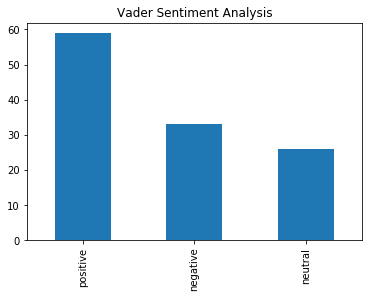

In [16]:
df.vader_sentiment.value_counts().plot(kind='bar',title="Vader Sentiment Analysis")

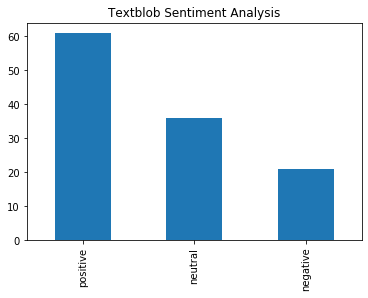

In [17]:
df.tb_sentiment.value_counts().plot(kind='bar',title="Textblob Sentiment Analysis")